# Estimating Vaccine Efficacy

You have probably read things like "the Moderna vaccine is 90% effective." What does that mean?
How is effectiveness estimated? Can the uncertainty of the estimate be quantified meaningfully? How?



## The experiment

We will idealize the experiment as follows: there is a population of $N$ subjects of whom $n$ are selected at random to be vaccinated with the active vaccine; the remaining $m=N-n$ subjects receive a placebo.
In reality, the randomization involves stratifying on age and other covariates and may also be stratified by recruitment center.

We will ignore how the $N$ subjects were recruited: they are not necessarily representative of any larger group.

In

Vaccine efficacy is defined as

\begin{equation*}
\mbox{VE} \equiv 1 - \frac{\mbox{risk among unvaccinated} - \mbox{risk among vaccinated}}{\mbox{risk among unvaccinated}}.
\end{equation*}
This is the naive estimate of the fraction of infections vaccinations prevent.

### Complications

+ recruitment happens over some period of time
+ infections are observed only if they occur during some period; not all infections during that period are necessarily observed
+ vaccination may affect behavior

## Bayesian estimation of a binomial probability

### The beta-binomial distribution

The random variable $X$ has a beta-binomial distribution with parameters $n$, $\alpha$, and $\beta$ if $X \sim \mbox{Binom}(n, P)$ with $P \sim \mbox{Beta}(\alpha, \beta)$.

That is, the probability density of $P$ is
\begin{equation*}
f_P(p) = p^{\alpha-1}(1-p){\beta-1}/B(\alpha, \beta),
\end{equation*}
where $B(\cdot, \cdot)$ is the Beta function.
The probability mass function of $X$ is
\begin{equation*}
p_X(k) = \binom{n}{k} \frac{B(k+\alpha, n-k+\beta)}{B(\alpha, \beta)}.
\end{equation*}

The Beta distribution is _conjugate_ to the binomial.

### Connection to other distributions

There is a population of $N$ objects of which $G$ are labeled "1" and the rest are labeled "0."

If we sample with replacement $n$ times from this population, the distribution of the sample sum is binomial with parameters $n$ and $p=G/N$.
If we sample without replacement $n\le N$ times from this population, the distribution of the sample sum is hypergeometric with parameters $N$, $G$, and $n$.
If we sample from this population and each time we draw, we not only replace the item drawn but also put another item with the same value into the population, the sample sum is beta-binomial with parameters $n$, $\alpha = G$, and $\beta = N-G$.

In [3]:
import scipy as sp
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import math

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import clear_output, display, HTML

In [29]:
def plotBeta(alpha, beta, points=100):
    '''
    Plot the beta density function
    
    Parameters
    ----------
    alpha : float
        the alpha parameter of the beta distribution
    beta : float
        the alpha parameter of the beta distribution
        
    Returns
    -------
    no return value
    '''
    fig, ax = plt.subplots(1, 1)
    x = np.linspace(stats.beta.ppf(0.01, alpha, beta),
                stats.beta.ppf(0.99, alpha, beta), points)
    lbl = 'beta pdf with parameters \alpha={} and \beta={}'.format(alpha,beta)
    ax.plot(x, stats.beta.pdf(x, alpha, beta), 'r-', lw=5, label=lbl)

In [35]:
interact(plotBeta, alpha=widgets.FloatSlider(value=1, min=0, max=10),\
                   beta=widgets.FloatSlider(value=1, min=0, max=10),\
                   points=fixed(100))

interactive(children=(FloatSlider(value=1.0, description='alpha', max=10.0), FloatSlider(value=1.0, descriptio…

<function __main__.plotBeta(alpha, beta, points=100)>

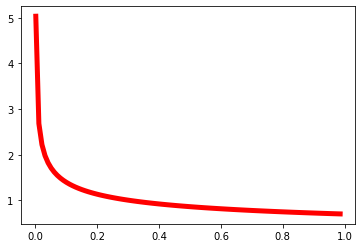

In [31]:
a, b = 0.700102, 1
plotBeta(a,b)

In [13]:
D_0 = 2474507
D_6 = 1877963
N_0 = 4997716
N_6 = 4092373
p_6 = .459
p_0 = .495
p_pool = (p_6*N_6 + p_0*N_0)/(N_6 + N_0)

In [16]:
Z_1 = (D_0 - D_6)/math.sqrt(N_6*p_6*(1-p_6)+N_0*p_0*(1-p_0))
Z_1

396.33161841757175

In [17]:
Z_2 = (D_0 - D_6)/math.sqrt(N_6*p_pool*(1-p_pool)+N_0*p_pool*(1-p_pool))
Z_2

396.0768029064531

In [6]:
x = np.array([0, -1, 1])
any(x<0)

True

In [24]:
from numpy.random import default_rng, binomial, exponential
rng = default_rng(1502021) # set the seed for reproducibility
n = 4
p=0.3
steps = 100


In [23]:
X = rng.binomial(n, p, size=steps)
W = np.cumsum(X - n*p)
np.insert(W, 0, 0)

array([ 0.00000000e+00, -2.00000000e-01, -4.00000000e-01,  4.00000000e-01,
        1.20000000e+00,  1.00000000e+00,  1.80000000e+00,  1.60000000e+00,
        4.00000000e-01,  2.00000000e-01,  2.00000000e+00,  1.80000000e+00,
        1.60000000e+00,  2.40000000e+00,  1.20000000e+00,  1.00000000e+00,
        1.80000000e+00,  6.00000000e-01,  4.00000000e-01,  2.00000000e-01,
       -1.00000000e+00, -2.00000000e-01,  6.00000000e-01,  4.00000000e-01,
        2.00000000e-01,  1.00000000e+00,  8.00000000e-01,  6.00000000e-01,
        1.40000000e+00,  2.20000000e+00,  1.00000000e+00,  8.00000000e-01,
        6.00000000e-01, -6.00000000e-01, -8.00000000e-01, -1.00000000e+00,
       -1.20000000e+00, -1.40000000e+00, -6.00000000e-01,  1.20000000e+00,
        1.00000000e+00,  1.80000000e+00,  6.00000000e-01,  1.40000000e+00,
        2.20000000e+00,  3.00000000e+00,  2.80000000e+00,  1.60000000e+00,
        2.40000000e+00,  1.20000000e+00,  1.77635684e-15,  8.00000000e-01,
       -4.00000000e-01, -

In [19]:
W

array([ 0.0000e+00, -2.0000e-01,  3.8000e+00,  9.8000e+00,  1.6800e+01,
        2.4800e+01,  3.4800e+01,  4.6800e+01,  5.9800e+01,  7.2800e+01,
        8.6800e+01,  1.0180e+02,  1.1780e+02,  1.3580e+02,  1.5580e+02,
        1.7680e+02,  1.9780e+02,  2.1880e+02,  2.3980e+02,  2.6080e+02,
        2.8380e+02,  3.0780e+02,  3.3180e+02,  3.5680e+02,  3.8480e+02,
        4.1380e+02,  4.4380e+02,  4.7580e+02,  5.0880e+02,  5.4280e+02,
        5.7680e+02,  6.1180e+02,  6.4880e+02,  6.8780e+02,  7.2880e+02,
        7.6980e+02,  8.1180e+02,  8.5480e+02,  8.9980e+02,  9.4480e+02,
        9.9080e+02,  1.0388e+03,  1.0878e+03,  1.1388e+03,  1.1908e+03,
        1.2458e+03,  1.3018e+03,  1.3588e+03,  1.4168e+03,  1.4758e+03,
        1.5348e+03,  1.5948e+03,  1.6558e+03,  1.7168e+03,  1.7808e+03,
        1.8448e+03,  1.9098e+03,  1.9768e+03,  2.0448e+03,  2.1128e+03,
        2.1828e+03,  2.2538e+03,  2.3258e+03,  2.3988e+03,  2.4718e+03,
        2.5448e+03,  2.6188e+03,  2.6928e+03,  2.7678e+03,  2.84

In [25]:
rng.exponential(5)

4.05148214114725

## A permutation approach

Shift model for effect; assume exchangeability under the null.

How many 1s need to be added to the treatment group for the test not to reject?



### Critiquing the permutation approach

Assumes "non-interference." Any given subject's response depends only on that subject's assignment, not on the assignment of any other subject.
Might or might not be a good model, depending on how the subjects were recruited.

Does not account for clustering of cases, contact among subjects, etc.

In [28]:
from math import factorial

def prob(n):
    f = lambda i: factorial(m)*factorial(n)/(factorial(i)*factorial(n-2*i)*factorial(m-n+i)*(2**i)*(m**n))
    prob = 0
    i = 0
    while i < n/2:
        prob += f(i)
        i += 1
    return prob
    
m = 1000

prob(200)

0.31302316081931464